In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['Species'] = encoder.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

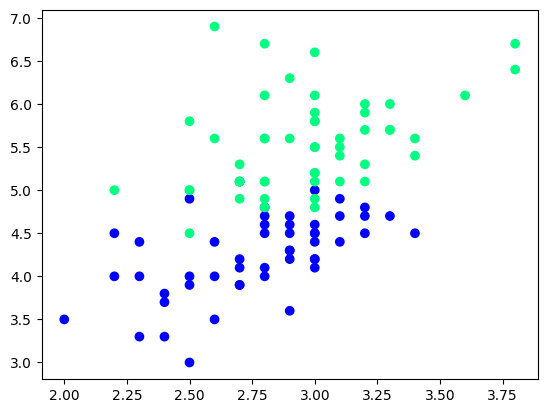

In [14]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [16]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
79,2.6,3.5,1
71,2.8,4.0,1
75,3.0,4.4,1
98,2.5,3.0,1
82,2.7,3.9,1
92,2.6,4.0,1
83,2.7,5.1,1
58,2.9,4.6,1
97,2.9,4.3,1
96,2.9,4.2,1


In [17]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [27]:
df_train.shape

(10, 3)

In [28]:
df_val

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
86,3.1,4.7,1
58,2.9,4.6,1
118,2.6,6.9,2
115,3.2,5.3,2


In [29]:
df_test

,SepalWidthCm,PetalLengthCm,Species
148,3.4,5.4,2
67,2.7,4.1,1
74,2.9,4.3,1
61,3.0,4.2,1
88,3.0,4.1,1


In [30]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [31]:
X_test

array([[2.7, 4.2],
       [3.1, 4.7],
       [2.9, 4.6],
       [2.6, 6.9],
       [3.2, 5.3]])

# Case 1 - Bagging

In [32]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
60,2.0,3.5,1
60,2.0,3.5,1
92,2.6,4.0,1
55,2.8,4.5,1
55,2.8,4.5,1
65,3.1,4.4,1
146,2.5,5.0,2


In [38]:
!pip install mlxtend

   ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [74]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [75]:
dt_bag1 = DecisionTreeClassifier()

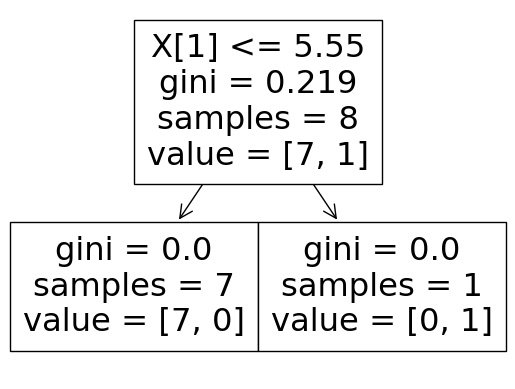

0.8


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


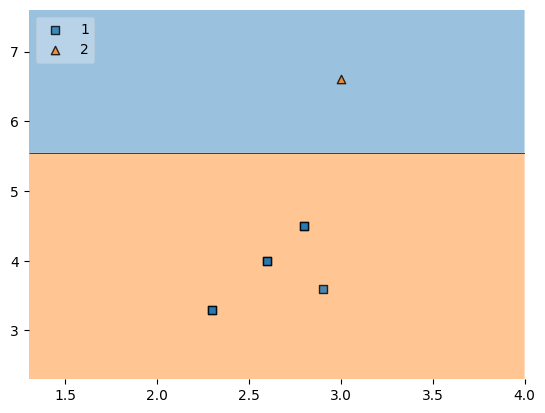

In [77]:
evaluate(dt_bag1,X,y)

In [78]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
93,2.3,3.3,1
60,2.0,3.5,1
113,2.5,5.0,2
65,3.1,4.4,1
146,2.5,5.0,2
113,2.5,5.0,2
93,2.3,3.3,1


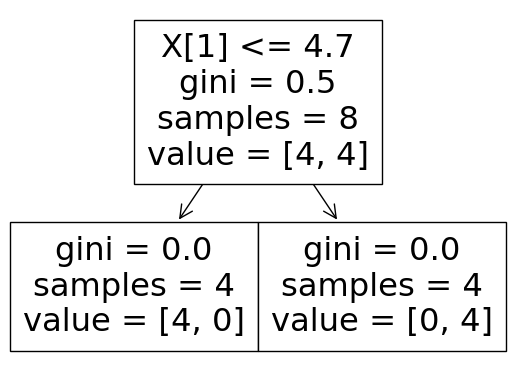

1.0


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


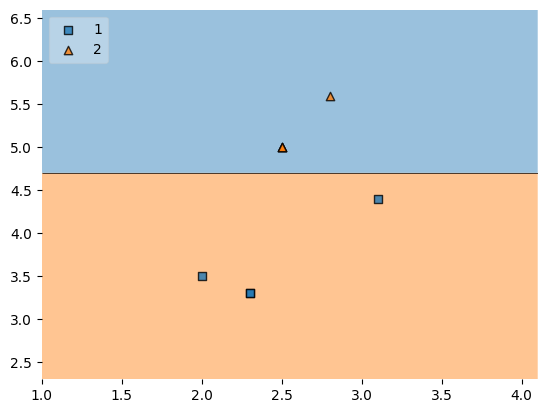

In [79]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [80]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
146,2.5,5.0,2
64,2.9,3.6,1
60,2.0,3.5,1
128,2.8,5.6,2
105,3.0,6.6,2
105,3.0,6.6,2
60,2.0,3.5,1


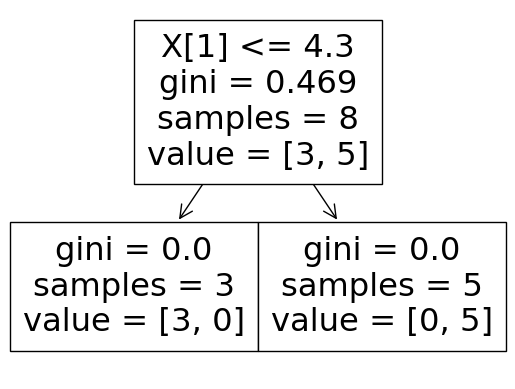

0.6


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


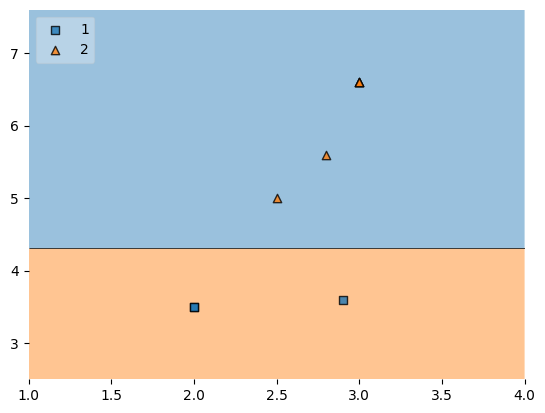

In [81]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [82]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [83]:
df_test

,SepalWidthCm,PetalLengthCm,Species
148,3.4,5.4,2
67,2.7,4.1,1
74,2.9,4.3,1
61,3.0,4.2,1
88,3.0,4.1,1


In [88]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Pasting

In [89]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
93,2.3,3.3,1
113,2.5,5.0,2
55,2.8,4.5,1
64,2.9,3.6,1
65,3.1,4.4,1
128,2.8,5.6,2
92,2.6,4.0,1
105,3.0,6.6,2
60,2.0,3.5,1


In [90]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
113,2.5,5.0,2
93,2.3,3.3,1
64,2.9,3.6,1
65,3.1,4.4,1
92,2.6,4.0,1
105,3.0,6.6,2
128,2.8,5.6,2
55,2.8,4.5,1


# Random Subspaces

In [94]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [95]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa


In [96]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Id
83,2.7,84
16,3.9,17
40,3.5,41
3,3.1,4
75,3.0,76
148,3.4,149
66,3.0,67
9,3.1,10
0,3.5,1
34,3.1,35


# Random Patches

In [97]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa


In [98]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,SepalWidthCm
148,6.2,3.4
34,4.9,3.1
9,4.9,3.1
83,6.0,2.7
0,5.1,3.5
0,5.1,3.5
83,6.0,2.7
3,4.6,3.1
